f:\WinPython-64bit-2.7.10.2\python-2.7.10.amd64\lib\site-packages\IPython\kernel\__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
f:\WinPython-64bit-2.7.10.2\python-2.7.10.amd64\lib\site-packages\IPython\kernel\__main__.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


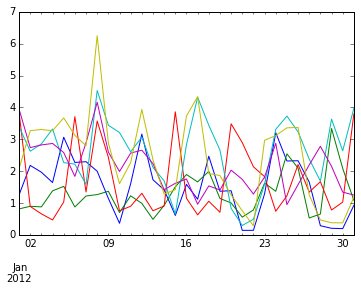

In [8]:
# (c) 2015 Teruhisa Okada

% matplotlib inline

import netCDF4
import datetime as dt
import numpy as np
import pandas as pd

import romspy


def rmse2(obsfile, modfile, varid, drange):

    mod = netCDF4.Dataset(modfile, 'r')
    obs = netCDF4.Dataset(obsfile, 'r')
    trange = netCDF4.date2num(drange, romspy.JST_days)

    time = obs.variables['obs_time'][:]
    index = np.where((time > trange[0]) & (time < trange[1]))
    
    time = netCDF4.num2date(time[index], romspy.JST_days)
    x = mod.variables['NLmodel_value'][index]
    y = obs.variables['obs_value'][index]
    type = obs.variables['obs_type'][index]
    depth = obs.variables['obs_depth'][index]
    station = obs.variables['obs_station'][index]
    
    data = {'station': station, 'depth': depth, 'type': type, 'x': x, 'y': y}
    df = pd.DataFrame(data, index=time)
    df = df[df.x<999.9]
    df = df[df.x>1.0]
    df = df[df.type==varid]
    
    for s in [3,4,5,6,12,13]:
        sta = df[df.station==s]
        sta['error'] = sta.y - sta.x
        sta['SE'] = sta.error ** 2

        #print df.head(30)

        sta = sta.resample('D', how='mean')
        sta['RMSE'] = np.sqrt(sta.SE)
        sta.RMSE.plot()

        
obsfile = 'F:/okada/Dropbox/Data/ob500_obs_2012_obweb-4.nc'
modfile = 'Z:/roms/Apps/OB500_fennelP/NL12/ob500_mod.nc'
varid = 7
drange = [dt.datetime(2012,1,1,0), dt.datetime(2012,2,1,0)]

rmse2(obsfile, modfile, varid, drange)